## Data Wrangling

### 1.0 Imports

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import datetime as dt
import geopandas as gpd
from shapely.geometry import Point, Polygon

### 2.0 Load Data

#### 2.1 Trees Data
\
The first source is from a source on data.dryad.org with record of over 5 million tress in 63 US cities. \
https://datadryad.org/stash/dataset/doi:10.5061/dryad.2jm63xsrf \
\
The data is split into a .csv file per city. We will only be using the 'Seattle_Final_2022-06-18.csv' file.

In [3]:
trees = pd.read_csv('data/Seattle_Final_2022-06-18.csv')
trees.head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,...,most_recent_observation_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,height_M,height_binned_M,percent_population
0,07/22/1991,04/27/2019,(european) white birch,Betula pendula,Seattle,Washington,-122.282080,47.635207,no_info,1817 40th Av E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/16/1990,04/27/2019,Red oak,Quercus rubra,Seattle,Washington,-122.310243,47.597548,no_info,1632 S Weller St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/25/1992,04/27/2019,Apple/crabapple,Malus,Seattle,Washington,-122.355204,47.673916,no_info,300 N 62Nd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/30/1991,04/27/2019,Kwanzan flowering cherry,Prunus L.,Seattle,Washington,-122.318952,47.649141,no_info,3120 Fuhrman Av E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/16/1991,04/27/2019,English (hedge) maple,Acer campestre,Seattle,Washington,-122.344731,47.613092,no_info,120 Blanchard St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165623 entries, 0 to 165622
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   planted_date                      162654 non-null  object 
 1   most_recent_observation           165623 non-null  object 
 2   common_name                       164947 non-null  object 
 3   scientific_name                   164903 non-null  object 
 4   city                              165623 non-null  object 
 5   state                             165623 non-null  object 
 6   longitude_coordinate              165623 non-null  float64
 7   latitude_coordinate               165623 non-null  float64
 8   location_type                     165623 non-null  object 
 9   address                           165388 non-null  object 
 10  diameter_breast_height_CM         165623 non-null  float64
 11  condition                         165623 non-null  o

##### 2.1.1 Update Datatypes

There are some columns with datatypes that need updating, so I'm going to save the col:dtype into a dictionary, update the values, and pass them back to the df to update the types.

In [5]:
#Create a dictionary of my fields and types as key: value
field_dict = {k:str(v[0]) for k,v in pd.DataFrame(trees.dtypes).T.to_dict('list').items()}
field_dict

{'planted_date': 'object',
 'most_recent_observation': 'object',
 'common_name': 'object',
 'scientific_name': 'object',
 'city': 'object',
 'state': 'object',
 'longitude_coordinate': 'float64',
 'latitude_coordinate': 'float64',
 'location_type': 'object',
 'address': 'object',
 'diameter_breast_height_CM': 'float64',
 'condition': 'object',
 'native': 'object',
 'diameter_breast_height_binned_CM': 'object',
 'greater_metro': 'object',
 'city_ID': 'float64',
 'tree_ID': 'float64',
 'retired_date': 'float64',
 'most_recent_observation_type': 'float64',
 'zipcode': 'float64',
 'neighborhood': 'float64',
 'location_name': 'float64',
 'ward': 'float64',
 'district': 'float64',
 'overhead_utility': 'float64',
 'height_M': 'float64',
 'height_binned_M': 'float64',
 'percent_population': 'float64'}

In [6]:
#Update created dictionary to what field types I want standardized
field_dict.update({
 'city_ID': 'object',
 'tree_ID': 'object',
 'retired_date': 'object',
 'most_recent_observation_type': 'object',
 'zipcode': 'object',
 'neighborhood': 'object',
 'location_name': 'object',
 'ward': 'object',
 'district': 'object',
 'overhead_utility': 'object',
 'height_binned_M': 'object',
 'planted_date': 'datetime64[ns]',
 'most_recent_observation': 'datetime64[ns]',
 'retired_date': 'datetime64[ns]'})

In [7]:
#validate updates
field_dict

{'planted_date': 'datetime64[ns]',
 'most_recent_observation': 'datetime64[ns]',
 'common_name': 'object',
 'scientific_name': 'object',
 'city': 'object',
 'state': 'object',
 'longitude_coordinate': 'float64',
 'latitude_coordinate': 'float64',
 'location_type': 'object',
 'address': 'object',
 'diameter_breast_height_CM': 'float64',
 'condition': 'object',
 'native': 'object',
 'diameter_breast_height_binned_CM': 'object',
 'greater_metro': 'object',
 'city_ID': 'object',
 'tree_ID': 'object',
 'retired_date': 'datetime64[ns]',
 'most_recent_observation_type': 'object',
 'zipcode': 'object',
 'neighborhood': 'object',
 'location_name': 'object',
 'ward': 'object',
 'district': 'object',
 'overhead_utility': 'object',
 'height_M': 'float64',
 'height_binned_M': 'object',
 'percent_population': 'float64'}

In [8]:
#Update dtyles
trees = trees.astype(field_dict)
trees.head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,...,most_recent_observation_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,height_M,height_binned_M,percent_population
0,1991-07-22,2019-04-27,(european) white birch,Betula pendula,Seattle,Washington,-122.282080,47.635207,no_info,1817 40th Av E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-16,2019-04-27,Red oak,Quercus rubra,Seattle,Washington,-122.310243,47.597548,no_info,1632 S Weller St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992-06-25,2019-04-27,Apple/crabapple,Malus,Seattle,Washington,-122.355204,47.673916,no_info,300 N 62Nd St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-07-30,2019-04-27,Kwanzan flowering cherry,Prunus L.,Seattle,Washington,-122.318952,47.649141,no_info,3120 Fuhrman Av E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-07-16,2019-04-27,English (hedge) maple,Acer campestre,Seattle,Washington,-122.344731,47.613092,no_info,120 Blanchard St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
trees.describe()

,longitude_coordinate,latitude_coordinate,diameter_breast_height_CM,height_M,percent_population
count,165623.000000,165623.000000,165623.000000,0.0,0.0
mean,-122.336843,47.625930,21.459268,NaN,NaN
std,0.038161,0.056614,18.750966,NaN,NaN
min,-122.419024,47.495836,0.000000,NaN,NaN
25%,-122.368956,47.576060,7.620000,NaN,NaN
50%,-122.335076,47.636938,15.240000,NaN,NaN
75%,-122.306104,47.673012,30.480000,NaN,NaN
max,-122.238583,47.734069,330.200000,NaN,NaN


In [10]:
trees.shape

(165623, 28)

##### 2.1.2 Explore Missing Values

In [11]:
#create dataframe with each column, missing records count, and missing percent
missing = pd.concat([trees.isna().sum(), 100 * trees.isna().mean()], axis=1)
missing.columns=['missing_count', 'missing_perc']
missing.sort_values(by='missing_count', ascending=False)

,missing_count,missing_perc
percent_population,165623,100.000000
city_ID,165623,100.000000
height_binned_M,165623,100.000000
height_M,165623,100.000000
overhead_utility,165623,100.000000
district,165623,100.000000
ward,165623,100.000000
location_name,165623,100.000000
neighborhood,165623,100.000000
zipcode,165623,100.000000


**Observations** \
It is hit or miss here on whether our fields have values. 13 of the fields are completely blank, so I will drop those. The rest I will hold until later to see if there is anything more worth understanding. 

##### 2.1.3 Drop Missing Fields

In [12]:
trees.drop(columns=['percent_population', 'city_ID', 'height_binned_M','height_M', 'overhead_utility', 'district', 'ward', 'location_name', 'neighborhood', 'zipcode', 'most_recent_observation_type', 'retired_date', 'tree_ID'], inplace=True)

In [13]:
trees.head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,greater_metro
0,1991-07-22,2019-04-27,(european) white birch,Betula pendula,Seattle,Washington,-122.282080,47.635207,no_info,1817 40th Av E,40.64,excellent,introduced,30.48 to 45.72 cm,Seattle
1,1990-08-16,2019-04-27,Red oak,Quercus rubra,Seattle,Washington,-122.310243,47.597548,no_info,1632 S Weller St,33.02,good,introduced,30.48 to 45.72 cm,Seattle
2,1992-06-25,2019-04-27,Apple/crabapple,Malus,Seattle,Washington,-122.355204,47.673916,no_info,300 N 62Nd St,15.24,dead/dying,no_info,0 to 15.24 cm,Seattle
3,1991-07-30,2019-04-27,Kwanzan flowering cherry,Prunus L.,Seattle,Washington,-122.318952,47.649141,no_info,3120 Fuhrman Av E,5.08,fair,no_info,0 to 15.24 cm,Seattle
4,1991-07-16,2019-04-27,English (hedge) maple,Acer campestre,Seattle,Washington,-122.344731,47.613092,no_info,120 Blanchard St,15.24,excellent,introduced,0 to 15.24 cm,Seattle


#### 2.1.4 Create 'Age' Field
I think this will be a useful field, so before exploring further I want to add it to our dataframe.

In [14]:
#Add a column with the age in years at the time of the most recent observation
trees['age_at_obs'] = (trees['most_recent_observation'] - trees['planted_date']) / np.timedelta64(1, 'Y')

In [15]:
trees.head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,greater_metro,age_at_obs
0,1991-07-22,2019-04-27,(european) white birch,Betula pendula,Seattle,Washington,-122.282080,47.635207,no_info,1817 40th Av E,40.64,excellent,introduced,30.48 to 45.72 cm,Seattle,27.765115
1,1990-08-16,2019-04-27,Red oak,Quercus rubra,Seattle,Washington,-122.310243,47.597548,no_info,1632 S Weller St,33.02,good,introduced,30.48 to 45.72 cm,Seattle,28.696003
2,1992-06-25,2019-04-27,Apple/crabapple,Malus,Seattle,Washington,-122.355204,47.673916,no_info,300 N 62Nd St,15.24,dead/dying,no_info,0 to 15.24 cm,Seattle,26.836964
3,1991-07-30,2019-04-27,Kwanzan flowering cherry,Prunus L.,Seattle,Washington,-122.318952,47.649141,no_info,3120 Fuhrman Av E,5.08,fair,no_info,0 to 15.24 cm,Seattle,27.743212
4,1991-07-16,2019-04-27,English (hedge) maple,Acer campestre,Seattle,Washington,-122.344731,47.613092,no_info,120 Blanchard St,15.24,excellent,introduced,0 to 15.24 cm,Seattle,27.781542


#### 2.1.5 Explore Distribution of Values

I want to verify how my 'age' field will look for reocrds with null planted or observation date.

In [16]:
trees[trees['most_recent_observation'].isna()].head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,greater_metro,age_at_obs
146185,2005-01-01,NaT,Sweetgum,Liquidambar styraciflua,Seattle,Washington,-122.306118,47.627077,no_info,905 20th Ave E,17.78,good,introduced,15.24 to 30.48 cm,Seattle,NaN
165276,2011-11-01,NaT,Douglas fir,Pseudotsuga menziesii,Seattle,Washington,-122.359782,47.721374,no_info,2557 2Nd Ave Nw,45.72,good,naturally_occurring,30.48 to 45.72 cm,Seattle,NaN
165278,2011-01-01,NaT,White spruce,Picea glauca,Seattle,Washington,-122.360469,47.721405,no_info,12556 3rd Ave Nw,7.62,excellent,naturally_occurring,0 to 15.24 cm,Seattle,NaN
165279,2011-01-01,NaT,White spruce,Picea glauca,Seattle,Washington,-122.360512,47.721405,no_info,12556 3rd Ave Nw,7.62,excellent,naturally_occurring,0 to 15.24 cm,Seattle,NaN
165281,2011-01-01,NaT,White spruce,Picea glauca,Seattle,Washington,-122.360560,47.721406,no_info,12556 3rd Ave Nw,7.62,excellent,naturally_occurring,0 to 15.24 cm,Seattle,NaN


In [17]:
trees[trees['planted_date'].isna()].head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,greater_metro,age_at_obs
5,NaT,2019-04-27,Trident maple,Acer buergerianum,Seattle,Washington,-122.302651,47.688768,no_info,8204 23 Avne,2.54,excellent,introduced,0 to 15.24 cm,Seattle,NaN
19,NaT,2019-04-27,Common serviceberry,Amelanchier arborea,Seattle,Washington,-122.361200,47.708724,no_info,10757 3rd Av Nw,5.08,good,introduced,0 to 15.24 cm,Seattle,NaN
23,NaT,2019-04-27,Dogwood,Cornus,Seattle,Washington,-122.356600,47.706985,no_info,10702 Palatine Av N,5.08,excellent,no_info,0 to 15.24 cm,Seattle,NaN
33,NaT,2019-04-27,Paper (canoe) birch,Betula papyrifera,Seattle,Washington,-122.331357,47.690449,no_info,NaN,25.40,good,naturally_occurring,15.24 to 30.48 cm,Seattle,NaN
54,NaT,2019-04-27,Norwegian sunset maple,Acer truncatum,Seattle,Washington,-122.358000,47.708853,no_info,10715 1St Av Nw,7.62,good,introduced,0 to 15.24 cm,Seattle,NaN


For these records, the new age field will be an 'NaN', which I can impute later if needed. I'll checkout some other fields now.

In [18]:
#The location_type shows 'no_info' for all the records in my last preview - let's see those
trees['location_type'].value_counts()

no_info        163858
green_space      1765
Name: location_type, dtype: int64

In [19]:
#the 'native' field has some 'no_info' records as well
trees['native'].value_counts()

introduced             121176
no_info                 34560
naturally_occurring      9887
Name: native, dtype: int64

That's quite a few records with no info, I wonder if there are any instances of the same type of tree being flagged differently in the 'native' field?

In [20]:
common_native = trees.groupby(['common_name', 'native']).size().reset_index().rename(columns={0: 'count'})

In [21]:
common_native.shape

(707, 3)

In [22]:
len(common_native['common_name'].unique())

707

707 when we group by name and native and 707 unique names so there are no opportunities to map futher native statuses. Let's keep it rolling. What about mismatching common & scientific names?

In [23]:
comm_sci = trees.groupby(['common_name', 'scientific_name']).size().reset_index().rename(columns={0: 'count'})

In [24]:
comm_sci.shape

(704, 3)

In [25]:
len(comm_sci['common_name'].unique())

704

Looks good as well.

Do we need both the continuous diameter_breast_height and binned object?

In [26]:
trees['diameter_breast_height_binned_CM'].value_counts()

0 to 15.24 cm        83087
15.24 to 30.48 cm    46705
30.48 to 45.72 cm    21102
45.72 to 60.96 cm     7726
60.96 to 76.2 cm      3567
more than 76.2 cm     2811
Name: diameter_breast_height_binned_CM, dtype: int64

In [27]:
trees['diameter_breast_height_CM'].value_counts()

5.08      21972
10.16     14003
7.62      13309
15.24     12040
12.70     11115
          ...  
185.42        1
205.74        1
248.92        1
220.98        1
292.10        1
Name: diameter_breast_height_CM, Length: 97, dtype: int64

Comparing the actual values and the bins passes the quick eye-test, but do they make sense when plotted together?

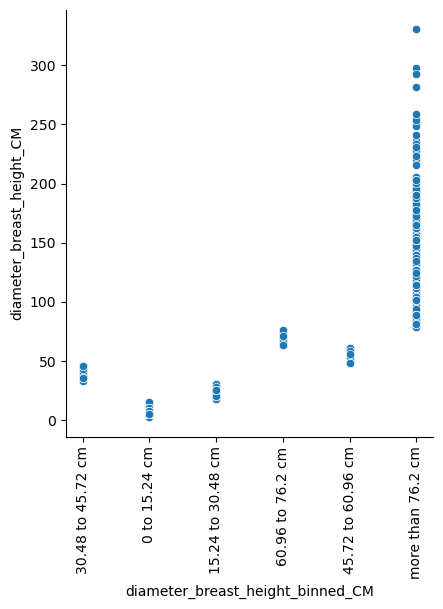

In [28]:
sns.relplot(x='diameter_breast_height_binned_CM', y='diameter_breast_height_CM', data=trees, kind='scatter')
plt.xticks(rotation=90)
plt.show()

Looks good! And makes me comfortable that I can stick with one or the other and not both.
\
\
Lastly, let's look at condition. What I want to eventually be my target feature


#### 2.1.6 Target Feature - Condition

In [29]:
trees['condition'].value_counts()

good          89835
fair          38408
excellent     22515
poor           8479
               3543
dead/dying     2843
Name: condition, dtype: int64

There are no NaNs, but some blank fields.

For the final target feature, I want to actually give a numerical value we can index for each of these text conditions (minus the blank).

In [30]:
trees['condition'].value_counts()

good          89835
fair          38408
excellent     22515
poor           8479
               3543
dead/dying     2843
Name: condition, dtype: int64

In [31]:
#define function
def cond_assign(cond):
    """Check condition input and assign numerical index based in input value."""
    if cond == 'excellent':
        index = 5
    elif cond == 'good':
        index = 4
    elif cond == 'fair':
        index = 3
    elif cond == 'poor':
        index = 2
    elif cond == 'dead/dying':
        index = 1
    else:
        index = None
    
    return index   

In [32]:
#Create new column
trees['condition_index'] = trees['condition'].apply(cond_assign)

In [33]:
trees.head()

,planted_date,most_recent_observation,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,location_type,address,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,greater_metro,age_at_obs,condition_index
0,1991-07-22,2019-04-27,(european) white birch,Betula pendula,Seattle,Washington,-122.282080,47.635207,no_info,1817 40th Av E,40.64,excellent,introduced,30.48 to 45.72 cm,Seattle,27.765115,5.0
1,1990-08-16,2019-04-27,Red oak,Quercus rubra,Seattle,Washington,-122.310243,47.597548,no_info,1632 S Weller St,33.02,good,introduced,30.48 to 45.72 cm,Seattle,28.696003,4.0
2,1992-06-25,2019-04-27,Apple/crabapple,Malus,Seattle,Washington,-122.355204,47.673916,no_info,300 N 62Nd St,15.24,dead/dying,no_info,0 to 15.24 cm,Seattle,26.836964,1.0
3,1991-07-30,2019-04-27,Kwanzan flowering cherry,Prunus L.,Seattle,Washington,-122.318952,47.649141,no_info,3120 Fuhrman Av E,5.08,fair,no_info,0 to 15.24 cm,Seattle,27.743212,3.0
4,1991-07-16,2019-04-27,English (hedge) maple,Acer campestre,Seattle,Washington,-122.344731,47.613092,no_info,120 Blanchard St,15.24,excellent,introduced,0 to 15.24 cm,Seattle,27.781542,5.0


In [34]:
#Validate index assignment
trees.groupby(['condition', 'condition_index']).size().reset_index().rename(columns={0: 'count'})

,condition,condition_index,count
0,dead/dying,1.0,2843
1,excellent,5.0,22515
2,fair,3.0,38408
3,good,4.0,89835
4,poor,2.0,8479


#### 2.1.7 Conclusions on Trees Data

- The new age field will be NaN for records with missing planted or observed dates. I will plan to impute based on median age for now.
- The location_type is mainly 'no data', I will drop this field
- The native field has a number of 'no data' records, but I will continue to hold until later in the analysis
- The diameter field and binned diamter field are duplicative, I will drop the binned field
- Common vs. Scientific are consistent accross both fields, meaning they're also duplicative. Since common name has more records (and I'm not a scientist) so I will keep this and drop scientific name
- I will prioritize the latitude and longitude for my location data, so I will drop address, city, state, and great_metro fields
- I can't impute on my target feature so I will drop any records missing a value for 'condition.'

#### 2.1.8 Further Dropping of Fields, Records for Trees Data

In [35]:
#Drop the location_type, diamter_breast_heigh_binned_CM, city, state, greater_metro, and scientific_name fields
seattle_trees = trees.drop(columns=['location_type', 'diameter_breast_height_binned_CM', 'address', 'city', 'state', 'greater_metro', 'scientific_name'])

In [36]:
#Drop blank condition records
seattle_trees = seattle_trees[seattle_trees['condition'] != ' ']

In [37]:
seattle_trees['condition'].value_counts()

good          89835
fair          38408
excellent     22515
poor           8479
dead/dying     2843
Name: condition, dtype: int64

In [38]:
print(trees.shape)
print(seattle_trees.shape)

(165623, 17)
(162080, 10)


### 2.2 Climate Data

We have 15-year climate normals data download from ncei.noaa.gov
\
https://www.ncei.noaa.gov/data/normals-annualseasonal/2006-2020/
\
\
This comes in .csv files for each weather station. I will need to filter them down to ones in our focus area.

In [39]:
path = 'data/climate_normals/'

all_files = glob.glob(os.path.join(path, '*.csv'))

In [40]:
climate_normals = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [41]:
climate_normals.shape

(1161, 2140)

That is a lot of fields! I'm going to start simple and focus on temperature avgerage, min, max, range and precipitation. On top of the location identifiers.
\
#### 2.2.1 Filter Down Columns

In [42]:
climate_normals = climate_normals[['STATION','LATITUDE','LONGITUDE','ELEVATION'
                                   ,'NAME','ANN-TAVG-NORMAL','comp_flag_ANN-TAVG-NORMAL'
                                   ,'years_ANN-TAVG-NORMAL','ANN-TMIN-NORMAL','comp_flag_ANN-TMIN-NORMAL'
                                   ,'years_ANN-TMIN-NORMAL','ANN-TMAX-NORMAL','comp_flag_ANN-TMAX-NORMAL'
                                   ,'years_ANN-TMAX-NORMAL','ANN-DUTR-NORMAL','comp_flag_ANN-DUTR-NORMAL'
                                   ,'years_ANN-DUTR-NORMAL','ANN-PRCP-NORMAL','comp_flag_ANN-PRCP-NORMAL'
                                   ,'years_ANN-PRCP-NORMAL']]

In [43]:
climate_normals.shape

(1161, 20)

That looks a lot better, but there are still way more stations here than what we need, so I want to filter down to only the ones in the Seattle area. I'll start with filtering down to Washington ('WA').

#### 2.2.2 Filter Down Rows

In [102]:
wa_climate = climate_normals[climate_normals['NAME'].str.contains('WA US')]

wa_climate.head(3)

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,ANN-TAVG-NORMAL,comp_flag_ANN-TAVG-NORMAL,years_ANN-TAVG-NORMAL,ANN-TMIN-NORMAL,comp_flag_ANN-TMIN-NORMAL,years_ANN-TMIN-NORMAL,ANN-TMAX-NORMAL,comp_flag_ANN-TMAX-NORMAL,years_ANN-TMAX-NORMAL,ANN-DUTR-NORMAL,comp_flag_ANN-DUTR-NORMAL,years_ANN-DUTR-NORMAL,ANN-PRCP-NORMAL,comp_flag_ANN-PRCP-NORMAL,years_ANN-PRCP-NORMAL
51,USW00094197,48.4608,-119.5167,395.0,"OMAK AP, WA US",49.9,R,21.0,38.8,R,21.0,61.0,R,21.0,22.2,R,21.0,11.60,R,20.0
97,USW00004237,47.5139,-123.8120,87.2,"QUINAULT 4 NE, WA US",50.0,R,13.0,42.0,R,13.0,58.0,R,13.0,16.0,R,13.0,151.45,R,11.0
99,USW00004223,48.5406,-121.4461,124.1,"DARRINGTON 21 NNE, WA US",49.8,R,17.0,40.8,R,17.0,58.8,R,17.0,18.0,R,17.0,83.00,R,15.0


#### 2.2.3 Explore Data Types and Distibution of Values

I think I have what I need here for the next step, but I'm curious to check completeness and see if any of the categorical flags vary between stations. I may find it best to drop a few more columns or gain some understanding from these checks.

##### 2.2.3.1 Check missing values

In [103]:
#create dataframe with each column, missing records count, and missing percent
missing_cl = pd.concat([wa_climate.isna().sum(), 100 * wa_climate.isna().mean()], axis=1)
missing_cl.columns=['missing_count', 'missing_perc']
missing_cl.sort_values(by='missing_count', ascending=False)

,missing_count,missing_perc
years_ANN-PRCP-NORMAL,1,3.030303
comp_flag_ANN-PRCP-NORMAL,1,3.030303
ANN-PRCP-NORMAL,1,3.030303
LATITUDE,0,0.000000
years_ANN-DUTR-NORMAL,0,0.000000
comp_flag_ANN-DUTR-NORMAL,0,0.000000
ANN-DUTR-NORMAL,0,0.000000
years_ANN-TMAX-NORMAL,0,0.000000
comp_flag_ANN-TMAX-NORMAL,0,0.000000
ANN-TMAX-NORMAL,0,0.000000


In [104]:
#is it the same record that is missing all 3 of those fields?
wa_climate[wa_climate['ANN-PRCP-NORMAL'].isna()]

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,ANN-TAVG-NORMAL,comp_flag_ANN-TAVG-NORMAL,years_ANN-TAVG-NORMAL,ANN-TMIN-NORMAL,comp_flag_ANN-TMIN-NORMAL,years_ANN-TMIN-NORMAL,ANN-TMAX-NORMAL,comp_flag_ANN-TMAX-NORMAL,years_ANN-TMAX-NORMAL,ANN-DUTR-NORMAL,comp_flag_ANN-DUTR-NORMAL,years_ANN-DUTR-NORMAL,ANN-PRCP-NORMAL,comp_flag_ANN-PRCP-NORMAL,years_ANN-PRCP-NORMAL
287,USW00024241,46.4833,-122.8167,115.5,"TOLEDO FAA AP, WA US",52.3,R,10.0,42.3,R,10.0,62.3,R,10.0,19.9,R,10.0,NaN,NaN,NaN


They do all come from the same station.

##### 2.2.3.2 Check Distribution of Categorical Value

I know from the documentation the 'comp_flag' has 4 possible values (S = Standard 24+ years, R = Representative 10+ years and missing months filled by surrounding stations, P = Provisional 10+ years and missing months not filled, E = Estimate 2+ years).
\
\
The 'years_ann' fields list the numbers of years from which data was pulled from to calculate the normals.
\
\
I'm hoping to see 'S' or 'R' and at least 10 in these fields for each record.

In [105]:
print(wa_climate['comp_flag_ANN-DUTR-NORMAL'].value_counts())
print(wa_climate['comp_flag_ANN-PRCP-NORMAL'].value_counts())
print(wa_climate['comp_flag_ANN-TAVG-NORMAL'].value_counts())
print(wa_climate['comp_flag_ANN-TMAX-NORMAL'].value_counts())
print(wa_climate['comp_flag_ANN-TMIN-NORMAL'].value_counts())

R    23
S    10
Name: comp_flag_ANN-DUTR-NORMAL, dtype: int64
R    20
S    12
Name: comp_flag_ANN-PRCP-NORMAL, dtype: int64
R    23
S    10
Name: comp_flag_ANN-TAVG-NORMAL, dtype: int64
R    22
S    11
Name: comp_flag_ANN-TMAX-NORMAL, dtype: int64
R    21
S    12
Name: comp_flag_ANN-TMIN-NORMAL, dtype: int64


In [106]:
print(wa_climate['years_ANN-DUTR-NORMAL'].min())
print(wa_climate['years_ANN-PRCP-NORMAL'].min())
print(wa_climate['years_ANN-TAVG-NORMAL'].min())
print(wa_climate['years_ANN-TMAX-NORMAL'].min())
print(wa_climate['years_ANN-TMAX-NORMAL'].min())
print(wa_climate['years_ANN-TMIN-NORMAL'].min())

10.0
11.0
10.0
10.0
10.0
10.0


#### 2.3.2.4 Check for Duplicates

Those look good, so the last check I'll do is looking for duplicates.

In [107]:
#Look for duplicates when matching unique comboes of station and name
stat_name = wa_climate.groupby(['STATION', 'NAME']).size().reset_index().rename(columns={0: 'count'})
print(stat_name.shape)
print(len(stat_name['STATION'].unique()))

(33, 3)
33


These are the stations all across the state, which is more than I need. I could map these out or look up the codes manually to find the few that are directly in an around Seattle.
\
\
Instead of doign these, my idea is to actually do some "clustering" to map each of my trees to their closest weather station in our climate normals dataset.

That Looks good too!

#### 2.3.3 Drop Columns

Since my categorical values were all consistent, I don't feel the need to keep them so I'll go ahead and drop.

In [110]:
#Drop the categorical comp_flag and years_ann fields
wash_climate = wa_climate.drop(columns=[
    'comp_flag_ANN-DUTR-NORMAL','comp_flag_ANN-PRCP-NORMAL','comp_flag_ANN-TAVG-NORMAL','comp_flag_ANN-TMAX-NORMAL','comp_flag_ANN-TMIN-NORMAL'
    ,'years_ANN-DUTR-NORMAL','years_ANN-PRCP-NORMAL','years_ANN-TAVG-NORMAL','years_ANN-TMAX-NORMAL','years_ANN-TMAX-NORMAL','years_ANN-TMIN-NORMAL'])

In [111]:
wash_climate.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,ANN-TAVG-NORMAL,ANN-TMIN-NORMAL,ANN-TMAX-NORMAL,ANN-DUTR-NORMAL,ANN-PRCP-NORMAL
51,USW00094197,48.4608,-119.5167,395.0,"OMAK AP, WA US",49.9,38.8,61.0,22.2,11.60
97,USW00004237,47.5139,-123.8120,87.2,"QUINAULT 4 NE, WA US",50.0,42.0,58.0,16.0,151.45
99,USW00004223,48.5406,-121.4461,124.1,"DARRINGTON 21 NNE, WA US",49.8,40.8,58.8,18.0,83.00
155,USW00024243,46.5683,-120.5428,324.3,"YAKIMA AIR TERMINAL, WA US",50.8,37.3,64.3,27.1,8.01
160,USW00094225,46.9728,-123.9303,3.7,"HOQUIAM BOWERMAN AP, WA US",51.0,44.7,57.4,12.7,68.76


In [113]:
wash_climate.shape

(33, 10)

### 2.3.4 Conclustions on Climate Data

I've got this filtered down to stations in washington with available climate normals data. There is more work to be done to map these to our trees data, but I want to explore some "clustering" in my EDA step to make this mapping as accurate as possible.
\
\
Once I have that mapped I can join in the relevant climate data to connect with my trees data.
\
\
A future state could be finding even more weather station data, but I wasn't able to find anything available in my searching with both temperature and precipitation data.